In [1]:
import pandas as pd
import itables
itables.init_notebook_mode(all_interactive=True)
itables.options.maxBytes=0
itables.options.maxColumns=0

prefix = "gnss_eval-1663259294"

pvt_df = pd.read_csv('%s-pvt.csv' % prefix)
sv_df = pd.read_csv('%s-sv.csv' % prefix)
connection_data_df = pd.read_csv('%s-conn.csv' % prefix)
device_db = pd.read_csv('gnss-test-devices.csv')


<IPython.core.display.Javascript object>

In [2]:
merged_df = pd.merge(pd.merge(pd.merge(pvt_df,connection_data_df, on=['device_id','measure_start_ms']), sv_df, on=['device_id','measure_start_ms', 'pvt_idx']), device_db, on=['device_id'])

In [3]:
merged_df

Unnamed: 0_x            device_id  measure_start_ms  pvt_idx  latitude  \
0                 0  nrf-351358811471140     1663258708000        0       0.0   
1                 0  nrf-351358811471140     1663258708000        0       0.0   
2                 0  nrf-351358811471140     1663258708000        0       0.0   
3                 0  nrf-351358811471140     1663258708000        0       0.0   
4                 0  nrf-351358811471140     1663258708000        0       0.0   
...             ...                  ...               ...      ...       ...   
24655          2054  nrf-351358814369325     1663259009000      119       0.0   
24656          2054  nrf-351358814369325     1663259009000      119       0.0   
24657          2054  nrf-351358814369325     1663259009000      119       0.0   
24658          2054  nrf-351358814369325     1663259009000      119       0.0   
24659          2054  nrf-351358814369325     1663259009000      119       0.0   

       longitude  altitude  accuracy  altitude_accuracy  speed  ...  vbatt  \
0            0.0       0.0       0.0                0.0    0.0  ...   4007   
1            0.0       0.0       0.0                0.0    0.0  ...   4007   
2            0.0       0.0       0.0                0.0    0.0  ...   4007   
3            0.0       0.0       0.0                0.0    0.0  ...   4007   
4            0.0       0.0       0.0                0.0    0.0  ...   4007   
...          ...       ...       ...                ...    ...  ...    ...   
24655        0.0       0.0       0.0                0.0    0.0  ...   4093   
24656        0.0       0.0       0.0                0.0    0.0  ...   4093   
24657        0.0       0.0       0.0                0.0    0.0  ...   4093   
24658        0.0       0.0       0.0                0.0    0.0  ...   4093   
24659        0.0       0.0       0.0                0.0    0.0  ...   4093   

       Unnamed: 0  sv_idx  sv  signal  cn0  elevation  azimuth  flags_y  \
0               0       0   0       0    0          0        0        0   
1               1       1   0       0    0          0        0        0   
2               2       2   0       0    0          0        0        0   
3               3       3   0       0    0          0        0        0   
4               4       4   0       0    0          0        0        0   
...           ...     ...  ..     ...  ...        ...      ...      ...   
24655       24655       7   0       0    0          0        0        0   
24656       24656       8   0       0    0          0        0        0   
24657       24657       9   0       0    0          0        0        0   
24658       24658      10   0       0    0          0        0        0   
24659       24659      11   0       0    0          0        0        0   

       version  
0           V1  
1           V1  
2           V1  
3           V1  
4           V1  
...        ...  
24655     V2-T  
24656     V2-T  
24657     V2-T  
24658     V2-T  
24659     V2-T  

[24660 rows x 36 columns]

In [4]:
data = merged_df.groupby(['device_id','measure_start_ms', 'pvt_idx', 'version'])['signal'].apply(lambda x: (x==1).sum()).reset_index(name='num_satellites')
data

device_id  measure_start_ms  pvt_idx version  num_satellites
0     nrf-351358811471140     1663258708000        0      V1               0
1     nrf-351358811471140     1663258708000        1      V1               0
2     nrf-351358811471140     1663258708000        2      V1               0
3     nrf-351358811471140     1663258708000        3      V1               0
4     nrf-351358811471140     1663258708000        4      V1               0
...                   ...               ...      ...     ...             ...
2050  nrf-351358814369754     1663259009000      115    V2-T               5
2051  nrf-351358814369754     1663259009000      116    V2-T               5
2052  nrf-351358814369754     1663259009000      117    V2-T               6
2053  nrf-351358814369754     1663259009000      118    V2-T               6
2054  nrf-351358814369754     1663259009000      119    V2-T               6

[2055 rows x 5 columns]

<AxesSubplot:xlabel='pvt_idx', ylabel='num_satellites'>

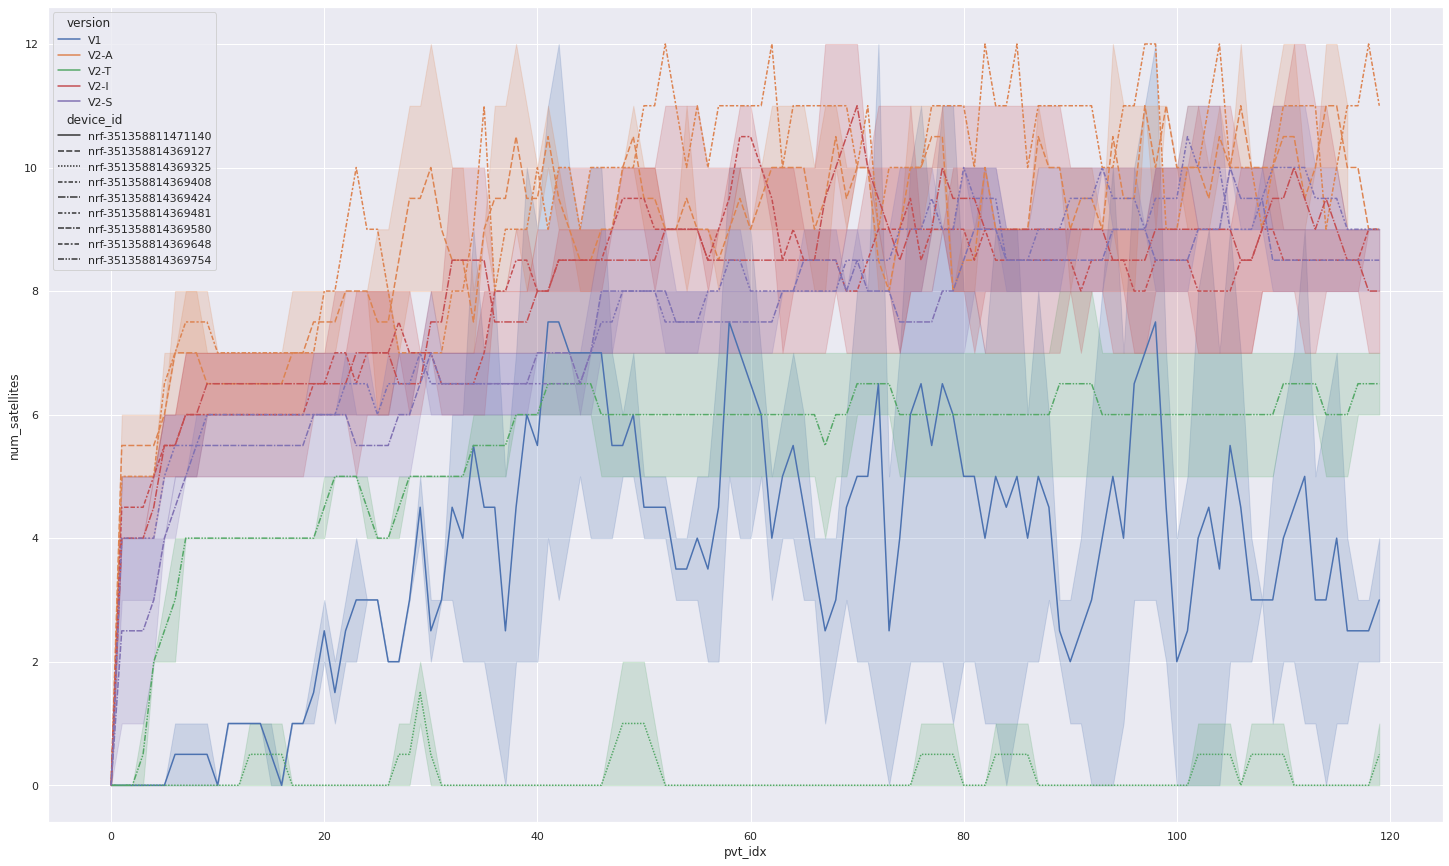

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25.0,15.0)})
sns.lineplot(data=data, x="pvt_idx", y="num_satellites", hue="version", style='device_id')